Imports

In [1]:
#Import all of the necessary packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, fixed
import ipywidgets as widgets
import io

font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               
               'size': 10,
              }
import sys
sys.path.append("../.")
import glob #glob is helpful for searching for filenames or directories
import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
import scipy #scientific python
from scipy.signal import blackmanharris as bh #for Blackman-Harris windowing
import pickle #for saving data
from scipy.special import gamma
import mpld3

C:\Users\Student\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
../.\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
../.\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
../.\tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


Pick Which Videos and ROIs You Want


Change the Data Directory, Data File, Frame Rate, and Image Dimension

In [2]:
Sample0={}

In [5]:
##Video 1
data_dir1 = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Tubulin\\2018_07_17\\40\\tub40fps_1\\"
datafile ="AllResultsTub40fps_1.p"

frame_rate = 40.0
imDimension =256    ##Change this accordingly

f = open(data_dir1+datafile,'rb')
AllResults = pickle.load(f)
f.close()


# ##Video 2 If you want to plot another graph...
# data_dir2 = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Tubulin\\2018_07_17\\40\\tub40fps_2\\"
# datafile2 ="AllResultsTub40fps_2.p"

# frame_rate2 = 40.0
# g = open(data_dir2+datafile2,'rb')
# AllResults2 = pickle.load(g)
# g.close()


In [6]:
## You dont have to edit anything here unless it can't find the fft files then change the ddmdatafile
if(imDimension == 256):
    ROIs = ['0','256','512']   ##for a 256
    dim='_256x256_'
elif(imDimension==128):
    ROIs = ['0','128','256','384','512','640'] ##for a 128
    dim='_128x128_'
for i in range(len(ROIs)):
    ROI = ROIs[i]
    
    fitparamsA = AllResults['fitparams'+str(ROI)]
    theoryA = AllResults['theory'+str(ROI)]
    chiA = AllResults['chi2'+str(ROI)]
    
    ##File Name of the fft files
    ddmdatafile = data_dir1.split("\\")[-2]+'_MMStack_Pos0.ome_'+str(ROI)+dim+'FFTDIFFS_dts_ravs.p'
    
    g = open(data_dir1+ddmdatafile,'rb')
    dat = pickle.load(g)
    g.close()
    
    Sample0['dts'+ROIs[i]]  = dat['dts']
    Sample0['ravs'+ROIs[i]] = dat['ravs']
    Sample0['ffts'+ROIs[i]] = dat['ffts']
    Sample0['times'+ROIs[i]]= dat['dts']/frame_rate
    
    
    
    

In [8]:
pickle.dump(Sample0, open(data_dir1+ '\\RavsForFits.p', 'wb'))

In [11]:
a = open(data_dir1+'\\RavsForFits.p','rb')
Sample0 = pickle.load(a)
a.close()

Plotting

pick your q index

In [27]:
q_index = 20

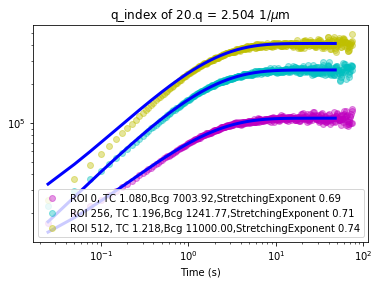

In [28]:
##plots all ROIs together
if(imDimension == 256):
    ROIs = [0,256,512]   ##for a 256
elif(imDimension==128):
    ROIs = [0,128,256,384,512,640] ##for a 128
col = ['mo','co','yo','ro','bo','ko']
px = .196
q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))

for i in range(len(ROIs)):
    ROI = ROIs[i]
    fitparamsA = AllResults['fitparams'+str(ROI)]
    theoryA = AllResults['theory'+str(ROI)]
    chiA = AllResults['chi2'+str(ROI)]
    
    times = Sample0['times'+str(ROIs[i])]
    ravs= Sample0['ravs'+str(ROIs[i])]
  
    
    plt.loglog(times,ravs[:,q_index],col[i],alpha=0.4, label = 'ROI %i, TC %.3f,Bcg %.2f,StretchingExponent %.2f'
               %(ROIs[i], fitparamsA[q_index][1], fitparamsA[q_index][2] ,fitparamsA[q_index][3] ))
    plt.loglog(times[:len(theoryA[q_index,:])], theoryA[q_index,:], '-b',lw=3)
plt.title('q_index of %i.q = %.3f 1/$\mu$m' %(q_index, q[q_index]))
plt.xlabel("Time (s)")
plt.legend()


    

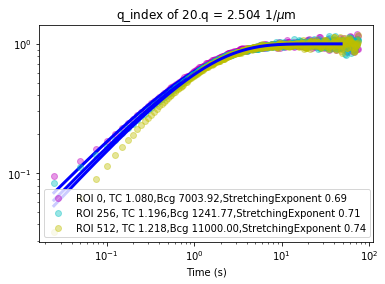

In [29]:
##scaled for better comparison
if(imDimension == 256):
    ROIs = [0,256,512]   ##for a 256
elif(imDimension==128):
    ROIs = [0,128,256,384,512,640] ##for a 128
col = ['mo','co','yo','ro','bo','ko']
px = .196
q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))

for i in range(len(ROIs)):
    ROI = ROIs[i]
    fitparamsA = AllResults['fitparams'+str(ROI)]
    theoryA = AllResults['theory'+str(ROI)]
    chiA = AllResults['chi2'+str(ROI)]
    
    times = Sample0['times'+str(ROIs[i])]
    ravs= Sample0['ravs'+str(ROIs[i])]
    adjustedravs = (ravs[:,q_index]-fitparamsA[q_index][2])/fitparamsA[q_index][0]
    adjustedtheoryA = (theoryA-fitparamsA[q_index][2])/fitparamsA[q_index][0]
    
    plt.loglog(times,adjustedravs,col[i],alpha=0.4, label = 'ROI %i, TC %.3f,Bcg %.2f,StretchingExponent %.2f'
               %(ROIs[i], fitparamsA[q_index][1], fitparamsA[q_index][2] ,fitparamsA[q_index][3] ))
    
    plt.loglog(times[:len(adjustedtheoryA[q_index,:])], adjustedtheoryA[q_index,:], '-b',lw=3)
plt.title('q_index of %i.q = %.3f 1/$\mu$m' %(q_index, q[q_index]))
plt.xlabel("Time (s)")
plt.legend()



In [33]:
for i in range(0,63):
    if (AllResults['fitparams512'][i][0]== 0.0 and i>0):
        print i